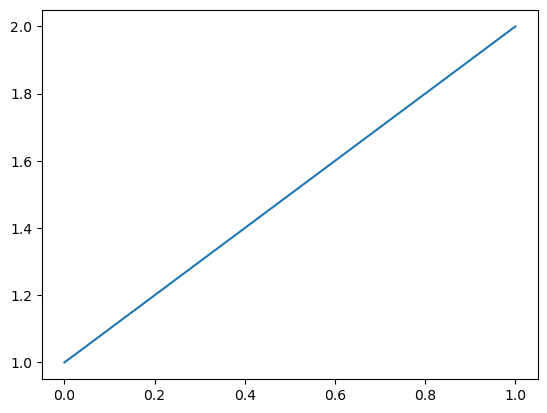

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2])

In [5]:
pip install --upgrade torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/db/44/ec7cf9cb0eec61da15ea08c0b81453634c57693b50525d3986a0486ac7da/torchvision-0.16.0-cp38-cp38-macosx_10_13_x86_64.whl.metadata
  Obtaining dependency information for torch==2.1.0 from https://files.pythonhosted.org/packages/a2/80/1936b67318f35a74aad0ef9e519bea187ff1fdf1f6644db675d86bc36860/torch-2.1.0-cp38-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/e8/f6/3eccfb530aac90ad1301c582da228e4763f19e719ac8200752a4841b0b2d/fsspec-2023.10.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.7/146.7 MB 17.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 4.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling 

In [8]:
pip show torchvision

Name: torchvision
Version: 0.16.0
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /opt/anaconda3/envs/deep/lib/python3.8/site-packages
Requires: numpy, pillow, requests, torch
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import torch
import torchvision.datasets as dset
# from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
%matplotlib inline

import torch.optim as optim

In [4]:
root = './data'
trans = transforms.ToTensor()
train_set = dset.MNIST(root, train=True,transform=trans,download=True)
test_set = dset.MNIST(root,train=False,transform=trans,download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 18163335.39it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 14918188.89it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21395928.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5977574.13it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
from torch.utils.data import DataLoader

In [6]:
train_loader = DataLoader(dataset=train_set,batch_size=128,shuffle=True)

In [7]:
comp_dim = 8

In [8]:
Encoder = nn.Sequential(
            nn.Linear(784,256),
            nn.ReLU(),
            nn.Linear(256,64),
            nn.Tanh(),
            nn.Linear(64,comp_dim))
    
Decoder = nn.Sequential(
            nn.Linear(comp_dim,64),
            nn.Tanh(),
            nn.Linear(64,256),
            nn.Tanh(),
            nn.Linear(256,784),
            nn.Sigmoid()
)
    

In [9]:
AutoEncoder = nn.Sequential(
                    Encoder,
                    Decoder )

In [10]:
learning_rate = 0.5
encoder_optimizer = optim.SGD(Encoder.parameters(), lr=learning_rate,momentum=0.99)
decoder_optimizer = optim.SGD(Decoder.parameters(), lr=learning_rate,momentum=0.99)

In [11]:
autoencoder_optimizer = optim.Adam(AutoEncoder.parameters(), lr=1e-3,betas=(0.9,0.99))

In [12]:
criterion = nn.MSELoss()

In [13]:
epochs = 5
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader):

        inputs, labels = data
        inputs = inputs.view(-1,1,28*28)

        autoencoder_optimizer.zero_grad()
#         decoder_optimizer.zero_grad()

        
#         outputs = Decoder(Encoder(inputs))
        outputs = AutoEncoder(inputs)
        loss = criterion(outputs,inputs)
        loss.backward()
        autoencoder_optimizer.step()
#         encoder_optimizer.step()
#         decoder_optimizer.step()

        
        running_loss += loss.item()
        
        if i % 100 == 99:
            losses.append(running_loss)
            print('[%d,%d], loss: %.3f' % (epoch + 1, i+1,running_loss/100))
            running_loss = 0.0
        

[1,100], loss: 0.082
[1,200], loss: 0.060
[1,300], loss: 0.055
[1,400], loss: 0.049
[2,100], loss: 0.040
[2,200], loss: 0.037
[2,300], loss: 0.034
[2,400], loss: 0.032
[3,100], loss: 0.029
[3,200], loss: 0.028
[3,300], loss: 0.027
[3,400], loss: 0.026
[4,100], loss: 0.025
[4,200], loss: 0.024
[4,300], loss: 0.024
[4,400], loss: 0.023
[5,100], loss: 0.023
[5,200], loss: 0.022
[5,300], loss: 0.022
[5,400], loss: 0.022


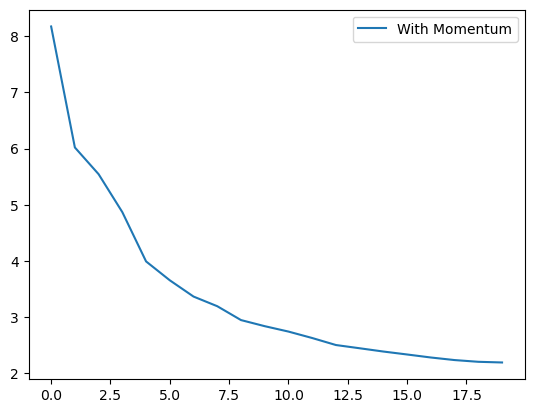

In [14]:
plt.plot(losses,label='With Momentum')
plt.legend(loc='best');

In [15]:
x = list(test_set)[7299][0]

In [16]:
print(x)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

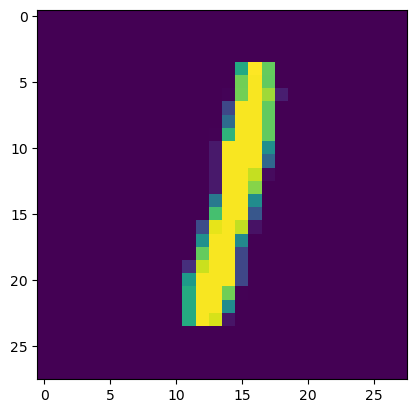

In [17]:
plt.imshow(x.detach().numpy().reshape(28,28));

In [18]:
x = x.view(-1,1,28 * 28)

In [19]:
z = Encoder(x)
z

tensor([[[ 1.4266,  0.3832,  0.6710,  0.6118, -1.2735, -0.5471,  3.0738,
           0.9394]]], grad_fn=<ViewBackward0>)

In [20]:
y = Decoder(z)

In [21]:
y.size()

torch.Size([1, 1, 784])

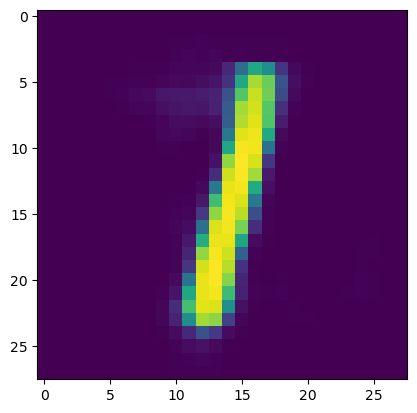

In [22]:
plt.imshow(y.detach().numpy().reshape(28,28));

In [23]:
points = np.array([Encoder(x[0].view(1,784)).detach().numpy() for x in train_set]).reshape(48000,4)

ValueError: cannot reshape array of size 480000 into shape (48000,4)

In [ ]:
labels = np.array([x[1] for x in train_set])

In [ ]:
plt.scatter(points[:,0],points[:,1],c = labels,cmap='tab10');

In [ ]:
labels